<a href="https://colab.research.google.com/github/dmassoo/ANLP/blob/main/AdvancedML_ITMO_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

Task 1.1

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/sample_data/34_16.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,9.957919,-0.313372,1.545316,-7.472619,23.927331,-23.049166,23.175311,-15.188089,-3.683897,-14.495080
1,-13.605338,0.956634,16.670004,19.817001,17.058416,0.271301,16.441257,24.391117,15.577653,-2.347044
2,-23.968653,14.297766,-17.975040,6.641784,-24.433218,23.896840,-3.871661,-11.332997,-15.710205,-3.709963
3,-22.754657,14.333500,-22.560778,8.336734,-22.195975,21.603492,-4.058626,-12.249236,-17.506484,-3.452613
4,-17.182040,-1.135857,19.560375,20.576616,16.387415,1.982753,15.304957,21.530390,12.824867,-2.549738


In [ ]:
data.shape

(60, 10)

In [ ]:
pca = PCA(n_components=2, svd_solver='full')
X_transformed = pca.fit(data).transform(data)
X_transformed[0]

array([-35.16936068,  33.80524677])

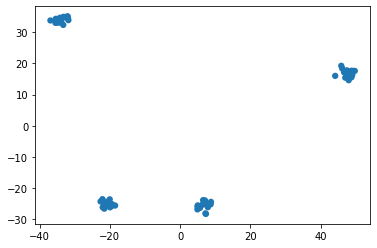

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], edgecolor='none', s=40,cmap='winter')

In [ ]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(data).transform(data)

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.516, 0.88 , 0.992, 0.994, 0.995, 0.997, 0.998, 0.999, 0.999,
       1.   ])

Task 1.2.

In [ ]:
L = pd.read_csv('/content/sample_data/X_loadings_792.csv', header=None, sep=';')

In [ ]:
R = pd.read_csv('/content/sample_data/X_reduced_792.csv', header=None, sep=';')

In [ ]:
R.head()

,0,1,2,3,4,5,6,7,8,9
0,-401.580553,99.589901,-91.455179,-121.064677,36.706456,-2.753688,6.458641,-2.553152,-1.231753,-0.050708
1,-401.580553,99.589901,-91.455179,-121.064677,36.706456,-2.753688,6.458641,-2.553152,-1.231753,-0.050708
2,-401.580553,99.589901,-91.455179,-121.064677,36.706456,-2.753688,6.458641,-2.553152,-1.231753,-0.050708
3,-401.580553,99.589901,-91.455179,-121.064677,36.706456,-2.753688,6.458641,-2.553152,-1.231753,-0.050708
4,-401.580553,99.589901,-91.455179,-121.064677,36.706456,-2.753688,6.458641,-2.553152,-1.231753,-0.050708


In [ ]:
L.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.000942e-17,1.127667e-17,-2.512862e-17,-4.057839e-17,1.638477e-17,-1.822666e-18,9.874229e-18,-4.650379e-18,-3.193856e-18,-1.562510e-19
1,-3.330669e-16,0.000000e+00,-1.110223e-16,-0.000000e+00,2.775558e-17,1.353084e-16,-2.151057e-16,3.122502e-17,1.045171e-16,-5.248894e-17
2,-0.000000e+00,0.000000e+00,5.551115e-17,-0.000000e+00,2.775558e-17,-7.285839e-17,1.387779e-17,7.806256e-17,-0.000000e+00,1.056013e-16
3,-0.000000e+00,2.220446e-16,8.326673e-17,2.775558e-16,-5.551115e-17,5.551115e-17,1.457168e-16,8.673617e-17,7.285839e-17,-6.754580e-17
4,-0.000000e+00,0.000000e+00,-1.110223e-16,1.387779e-17,-5.551115e-17,-4.163336e-17,-1.110223e-16,-1.387779e-16,3.469447e-17,-4.119968e-17


In [ ]:
R.shape

(100, 10)

In [ ]:
L.shape

(100, 10)

In [ ]:
X = R.dot(L.T)

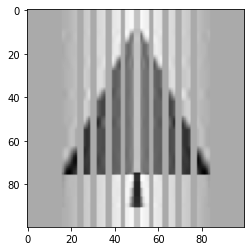

In [ ]:
plt.imshow(X, cmap='Greys_r')

# SVM

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

     |████████████████████████████████| 2.1 MB 29.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
imagePaths = sorted(list(paths.list_images('/content/drive/MyDrive/DC_Advanced_ML/train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

In [ ]:
len(imagePaths)

1000

In [ ]:
len(labels)

1000

In [ ]:
hist[:10]

array([5.0176519e-01, 1.0806076e-01, 1.7979415e-02, 3.8170060e-03,
       2.6324180e-05, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.2908415e-03, 5.1911283e-02], dtype=float32)

1


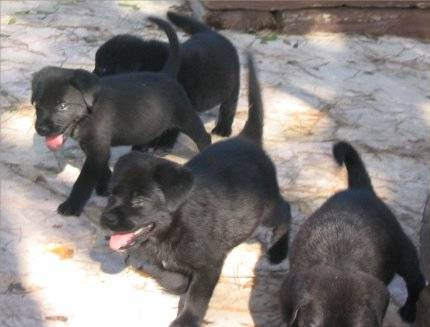

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[600])
Image(filename=imagePaths[600])

In [ ]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=3)

In [ ]:
model = LinearSVC(random_state = 3, C = 1.05)
model.fit(trainData, trainLabels)

LinearSVC(C=1.05, random_state=3)

In [ ]:
predictions = model.predict(testData)

In [ ]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

TypeError: ignored

In [ ]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.57416142557652

In [ ]:
model.coef_[0][37]

-0.036796595331287874

In [ ]:
singleImage = cv2.imread('/content/drive/MyDrive/DC_Advanced_ML/test/cat.1043.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

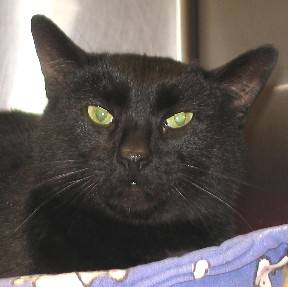

In [ ]:
Image(filename='/content/drive/MyDrive/DC_Advanced_ML/test/cat.1016.jpg')

In [ ]:
prediction

array([1])

# Decision Trees

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DC_Advanced_ML/diabetes.csv")
task_data = df[:520]

In [ ]:
task_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
task_data.shape

(520, 9)

In [ ]:
train = task_data.head(int(len(task_data)*0.8))
test = task_data.tail(int(len(task_data)*0.2))

In [ ]:
features = list(train.columns[:8])
x = train[features]
y = train['Outcome']

In [ ]:
520 -sum(task_data['Outcome'])

333

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy',#splitting criterion
                              min_samples_leaf=15, #minimum number of samples per leaf
                              max_leaf_nodes=25,
                        #maximum number of leaves
                              random_state=2020)
clf=tree.fit(x, y)

In [ ]:
clf

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=25,
                       min_samples_leaf=15, random_state=2020)

In [ ]:
clf.tree_.max_depth

8

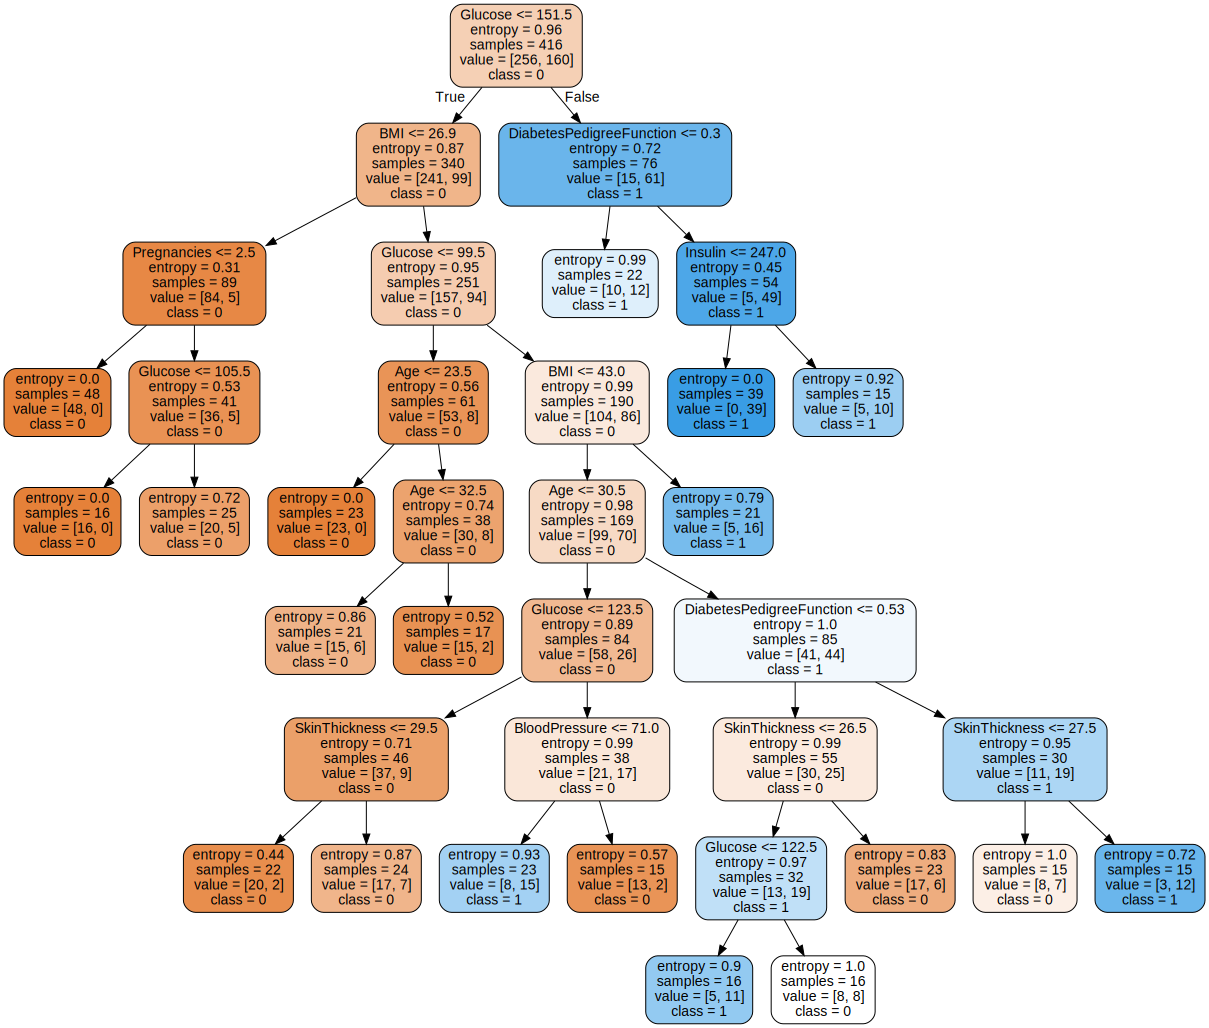

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
columns = list(trainData.columns)
export_graphviz(clf, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
features = list(test.columns[:8])
x = test[features]
y_true = test['Outcome']
y_pred = clf.predict(x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8173076923076923

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.759464394400487

In [ ]:
clf.predict([df.loc[719, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0

In [ ]:
clf.predict([df.loc[739, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [ ]:
clf.predict([df.loc[748, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


1

In [ ]:
clf.predict([df.loc[734, features].tolist()])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0

# Ensemble Learning

In [ ]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python
!pip install --upgrade scikit-learn==0.24.0

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.0 which is incompatible.


In [ ]:
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

In [ ]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [ ]:
train_path = '/content/drive/MyDrive/DC_Advanced_ML/train'
test_path = '/content/drive/MyDrive/DC_Advanced_ML/test'

In [ ]:
imagePaths = sorted(list(paths.list_images(train_path)))
trainData = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    trainData.append(hist)
    labels.append(label)

In [ ]:
Y = [1 if x == 'cat' else 0 for x in labels]

1


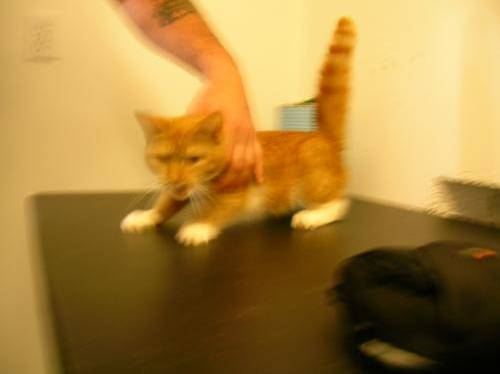

In [ ]:
print(Y[0])
Image(filename=imagePaths[0])

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state = 92, C = 1.92)
svm.fit(trainData, Y)

LinearSVC(C=1.92, random_state=92)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=92)
bagging = BaggingClassifier(tree, #базовый алгоритм
                            n_estimators=20, #количество деревьев
                            random_state=92)
bagging.fit(trainData, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_leaf_nodes=20,
                                                        min_samples_leaf=10,
                                                        random_state=92),
                  n_estimators=20, random_state=92)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=20, #количество деревьев
                             criterion='entropy', #критерий разделения
                              min_samples_leaf=10, #минимальное число объектов в листе
                              max_leaf_nodes=20, #максимальное число листьев
                              random_state=92)
forest.fit(trainData, Y)

RandomForestClassifier(criterion='entropy', max_leaf_nodes=20,
                       min_samples_leaf=10, n_estimators=20, random_state=92)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', random_state=92)

In [ ]:
from sklearn.ensemble import StackingClassifier

base_estimators = [('SVM', svm), ('Bagging DT', bagging), ('DecisionForest', forest)]
sclf = StackingClassifier(estimators=base_estimators, final_estimator=lr, cv=2)
sclf.fit(trainData, Y)

StackingClassifier(cv=2,
                   estimators=[('SVM', LinearSVC(C=1.92, random_state=92)),
                               ('Bagging DT',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                        max_leaf_nodes=20,
                                                                                        min_samples_leaf=10,
                                                                                        random_state=92),
                                                  n_estimators=20,
                                                  random_state=92)),
                               ('DecisionForest',
                                RandomForestClassifier(criterion='entropy',
                                                       max_leaf_nodes=20,
                                                       min_samples_leaf=10,
          

In [ ]:
sclf.score(trainData, Y)

0.849

In [ ]:
singleImage = cv2.imread(f'{test_path}/dog.1005.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = sclf.predict(histt2)

In [ ]:
prediction

array([0])

In [ ]:
sclf.predict_proba(histt2)

array([[0.90373628, 0.09626372]])

# Reenforcement Learing

In [ ]:
epsilon = 0.1 # Epsilon parameter which is used in epsilon-greedy strategy
gamma = 0.8 # Discount coefficient gamma
random_seed = 3 #Random seed
time_delay = 1 # Time delay when rendering the game process after training (seconds)
lr_rate = 0.9 #Learning rate alpha

In [ ]:
import gym
import numpy as np
import time
from IPython.display import clear_output


def generate_random_map(size, p, sd):
    """Generates a random valid map (one that has a path from start to goal)
    :param size: size of each side of the grid
    :param p: probability that a tile is frozen
    """
    valid = False
    np.random.seed(sd)

    # DFS to check that it's a valid path.
    def is_valid(res):
        frontier, discovered = [], set()
        frontier.append((0,0))
        while frontier:
            r, c = frontier.pop()
            if not (r,c) in discovered:
                discovered.add((r,c))
                directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
                for x, y in directions:
                    r_new = r + x
                    c_new = c + y
                    if r_new < 0 or r_new >= size or c_new < 0 or c_new >= size:
                        continue
                    if res[r_new][c_new] == 'G':
                        return True
                    if (res[r_new][c_new] not in '#H'):
                        frontier.append((r_new, c_new))
        return False

    while not valid:
        p = min(1, p)
        res = np.random.choice(['F', 'H'], (size, size), p=[p, 1-p])
        res[0][0] = 'S'
        res[-1][-1] = 'G'
        valid = is_valid(res)
    return ["".join(x) for x in res]

# Map generation
random_map = generate_random_map(size=6, p=0.8, sd = random_seed) #Create our map
env = gym.make("FrozenLake-v0", desc=random_map, is_slippery=False) #Initialize environment
print("Your map")
env.render() #Render the map

Your map

SFFFHH
FFFFFF
FFFFFF
FFFFFF
FFFFFH
HFHHFG


In [ ]:
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0,env.action_space.n) #***
    else:
        action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

def learn(state, state2, reward, action, done):
    if done:
      Q[state, action] = Q[state, action] + lr_rate * (reward - Q[state, action])
    else:
      Q[state, action] = Q[state, action] + lr_rate * (reward + gamma * np.max(Q[state2, :]) - Q[state, action])
    #Q[state, action] = #Your code here

In [ ]:
from tqdm import tqdm
# Inititalization
wins_arr = [] #delete
np.random.seed(random_seed)
total_games = 10000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
min_episode = 0 
#Main cycle
for episode in tqdm(range(total_games)):
    state = env.reset()
    t = 0
    while t < max_steps:
        if episode > 5 and wins_arr[episode-5] == 1 and wins_arr[episode-4] == 1 and wins_arr[episode-3] == 1 and wins_arr[episode-2] == 1 and wins_arr[episode-1] == 1 and min_episode ==0:
            min_episode = episode

        t += 1

        action = choose_action(state)

        state2, reward, done, info = env.step(action)

        if t == max_steps:
          done = True  

        learn(state, state2, reward, action, done)

        state = state2

        if done:
          break

  0%|          | 6/10000 [00:00<00:33, 302.00it/s]


IndexError: ignored

In [ ]:
print("The number of victories in a series of 10,000 games: ", #Your code here)
print("Five wins in a row were first won in the game ", #Your code here)

SyntaxError: ignored

In [ ]:
import time
#Greedy action selection
def choose_action_one_game(state):
    action = np.random.choice(np.array(np.argwhere(Q[state, :] == np.amax(Q[state, :])).flatten().tolist()))
    return action

states=[]#Array to save agent states during the game
t = 0
state = env.reset()
wn = 0
while(t<100):
  env.render()
  time.sleep(time_delay)
  clear_output(wait=True)
  action = choose_action_one_game(state)  
  state2, reward, done, info = env.step(action)  
  states.append(state)
  state = state2
  t += 1
  if done and reward == 1:
    wn=1
  if done:
    break
if wn == 1:
  print("!!!WIN!!!")

In [ ]:
import matplotlib.pyplot as plt

def make_maze_pic(maze):
  maze_pic=[]
  for i in range(len(maze)):
    row = []
    for j in range(len(maze[i])):
      if maze[i][j] == 'S':
        row.append(0)
      if maze[i][j] == 'F':
        row.append(0)
      if maze[i][j] == 'H':
        row.append(1)
      if maze[i][j] == 'G':
        row.append(0)
    maze_pic.append(row)
  maze_pic = np.array(maze_pic)
  return maze_pic
  

#Make maze fit to plot
maze_pic = make_maze_pic(random_map)
nrows, ncols = maze_pic.shape

#Arrays of picture elements
rw = np.remainder(states,nrows)
cl = np.floor_divide(states,nrows)
if wn == 1:
  rw = np.append(rw, [nrows-1])
  cl = np.append(cl,[ncols-1])

#Picture plotting
fig, ax1 = plt.subplots(1, 1, tight_layout=True)
ax1.clear()
ax1.set_xticks(np.arange(0.5, nrows, step=1))
ax1.set_xticklabels([])
ax1.set_yticks(np.arange(0.5, ncols, step=1))
ax1.set_yticklabels([])
ax1.grid(True)
ax1.plot([0],[0], "gs", markersize=40)  # start is a big green square
ax1.text(0, 0.2,"Start", ha="center", va="center", color="white", fontsize=12) #Start text
ax1.plot([nrows-1],[ncols-1], "rs", markersize=40)  # exit is a big red square
ax1.text(nrows-1, ncols-1+0.2,"Finish", ha="center", va="center", color="white", fontsize=12) #Exit text
ax1.plot(rw,cl, ls = '-', color = 'blue') #Blue lines path
ax1.plot(rw,cl, "bo")  # Blue dots visited cells
ax1.imshow(maze_pic, cmap="binary")

In [ ]:
from tqdm import tqdm
np.random.seed(random_seed)
total_games = 40000
max_steps = 100
Q = np.zeros((env.observation_space.n, env.action_space.n))
#Main cycle
for game in tqdm(range(total_games)):
    state = env.reset()
    t = 0
    action = #Choice of action at the very beginning of each game
    while t < max_steps:
              
        t += 1

        state2, reward, done, info = env.step(action)

        action2 =  #choice of action for the next step of the game, as well as for updating the value of the current action

        if t == max_steps:
          done = True  

        learn(state, state2, reward, action, action2, done) # action2 is also passed to the training function

        state = state2

        action = action2

        if done:
          break

# Final task

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

In [ ]:
len(X_train)

60000

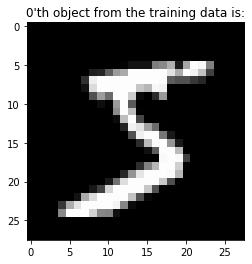

In [ ]:
plt.title("0'th object from the training data is:")
plt.imshow(X_train[0], cmap="gray")

In [ ]:
y_train[0]

5

In [ ]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)
# X_test = X_test.reshape(len(X_test), dim)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, svd_solver='full')
modelPCA = pca.fit(X_train) 

X_train = modelPCA.transform(X_train)
# X_test = modelPCA.transform(X_test)

In [ ]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.097, 0.168, 0.23 , 0.284, 0.332, 0.375, 0.408, 0.437, 0.465,
       0.488, 0.509, 0.529, 0.547, 0.564, 0.579, 0.594, 0.607, 0.62 ,
       0.632, 0.644, 0.654, 0.664, 0.674, 0.683, 0.692, 0.7  , 0.708,
       0.716, 0.724, 0.731])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=64)

In [ ]:
X_test.shape

(18000, 30)

In [ ]:
column_means = X_train.mean(axis=0)
column_means[0]

0.8657877802063445

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=64)
clf = OneVsRestClassifier(forest).fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)

In [ ]:
CM[5][5]

1467

In [ ]:
logreg = LogisticRegression(solver='lbfgs', random_state=64)
clf2 = OneVsRestClassifier(logreg).fit(X_train, y_train)

In [ ]:
y_pred2 = clf2.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred2)

In [ ]:
CM[6][6]

1671

In [ ]:
tree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=64)
clf3 = OneVsRestClassifier(tree).fit(X_train, y_train)

In [ ]:
y_pred3 = clf3.predict(X_test)
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred3)

In [ ]:
CM[8][8]

1375

In [ ]:
import pandas as pd
test_df = pd.read_csv("/content/drive/MyDrive/DC_Advanced_ML/pred_for_task.csv", index_col=0).drop(labels='Label', axis=1)

In [ ]:
test_df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,f779,f780,f781,f782,f783
FileName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
file1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
file2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
file3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
file4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
file5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


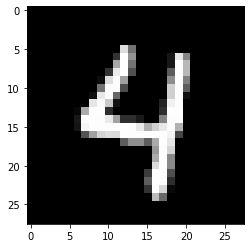

In [ ]:
# split on filename, labe, and f0-783
# todo take rows with required files
# transform
# predict
file28 = np.array(test_df.iloc[27])
plt.imshow(file28.reshape(28,28), cmap="gray")
file28 = file28.reshape(1,-1)

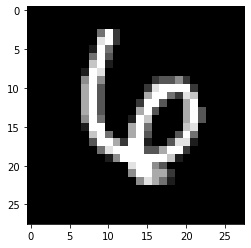

In [ ]:
file23 = np.array(test_df.iloc[22])
plt.imshow(file23.reshape(28,28), cmap="gray")
file23 = file23.reshape(1,-1)

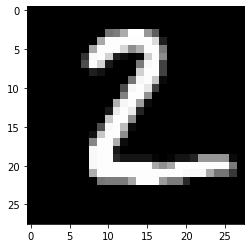

In [ ]:
file2 = np.array(test_df.iloc[1])
plt.imshow(file2.reshape(28,28), cmap="gray")
file2 = file2.reshape(1,-1)

In [ ]:
file28 = modelPCA.transform(file28)

In [ ]:
file23 = modelPCA.transform(file23)

In [ ]:
file2 = modelPCA.transform(file2)

In [ ]:
clf.predict_proba(file28)

array([[3.25958182e-05, 5.51412591e-03, 6.98455949e-03, 1.30960490e-02,
        8.99538104e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.48345660e-02]])

In [ ]:
clf2.predict_proba(file23)

array([[6.70648928e-07, 7.75062526e-06, 1.96094869e-03, 1.82564158e-04,
        4.97888464e-02, 1.60843841e-05, 9.02685123e-01, 4.28538986e-02,
        9.20826296e-04, 1.58328729e-03]])

In [ ]:
clf3.predict_proba(file2)

array([[0.        , 0.        , 0.71729958, 0.        , 0.        ,
        0.07172996, 0.        , 0.        , 0.21097046, 0.        ]])